In [44]:
import pandas as pd

### source - https://hackernoon.com/predicting-the-price-of-houses-in-brooklyn-using-python-1abd7997083b

In [132]:
housing_data = pd.read_csv("datasets/housing/brooklyn_sales_map.csv")

In [133]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390883 entries, 0 to 390882
Columns: 111 entries, Unnamed: 0 to SHAPE_Area
dtypes: float64(64), int64(11), object(36)
memory usage: 331.0+ MB


In [134]:
housing_data.describe()

,Unnamed: 0,borough,block,lot,easement,zip_code,residential_units,commercial_units,total_units,land_sqft,...,XCoord,YCoord,TaxMap,APPBBL,PLUTOMapID,FIRM07_FLA,PFIRM15_FL,MAPPLUTO_F,SHAPE_Leng,SHAPE_Area
count,390883.000000,390883.0,390883.000000,390883.000000,0.0,390883.000000,390883.000000,390883.000000,390883.000000,3.908830e+05,...,3.037280e+05,303728.000000,303710.000000,3.037280e+05,303728.000000,8653.0,27773.0,303728.000000,303728.000000,3.037280e+05
mean,195442.000000,3.0,4275.651169,272.509986,NaN,11208.429087,2.486138,0.174142,2.673227,2.368464e+03,...,9.921077e+05,175146.073694,31396.728152,1.927884e+08,1.000145,1.0,1.0,0.000244,337.445796,8.645885e+03
std,112838.346973,0.0,2642.765332,484.658837,NaN,361.207836,48.200178,1.653362,48.233343,2.509129e+04,...,7.391759e+04,18390.569903,754.905314,7.409608e+08,0.017021,0.0,0.0,0.036740,329.587401,3.116106e+04
min,1.000000,3.0,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000,3.000000,0.000000e+00,1.000000,1.0,1.0,0.000000,2.143758,1.007072e-01
25%,97721.500000,3.0,1786.000000,21.000000,NaN,11209.000000,1.000000,0.000000,1.000000,0.000000e+00,...,9.892368e+05,165334.750000,30611.000000,0.000000e+00,1.000000,1.0,1.0,0.000000,238.997798,1.938904e+03
50%,195442.000000,3.0,4305.000000,45.000000,NaN,11219.000000,1.000000,0.000000,1.000000,1.900000e+03,...,9.975955e+05,175906.000000,31506.000000,0.000000e+00,1.000000,1.0,1.0,0.000000,249.411350,2.316886e+03
75%,293162.500000,3.0,6585.000000,94.000000,NaN,11230.000000,2.000000,0.000000,2.000000,2.500000e+03,...,1.005059e+06,187140.000000,32005.000000,0.000000e+00,1.000000,1.0,1.0,0.000000,283.169119,3.478477e+03
max,390883.000000,3.0,8955.000000,9133.000000,NaN,33803.000000,20811.000000,355.000000,20811.000000,7.446955e+06,...,1.024202e+06,208406.000000,32605.000000,3.089321e+09,3.000000,1.0,1.0,7.000000,19861.521019,7.149338e+06


In [135]:
features = housing_data.columns.array

In [136]:
for feature in features:
    print(feature)

Unnamed: 0
borough
neighborhood
building_class_category
tax_class
block
lot
easement
building_class
address
apartment_number
zip_code
residential_units
commercial_units
total_units
land_sqft
gross_sqft
year_built
tax_class_at_sale
building_class_at_sale
sale_price
sale_date
year_of_sale
Borough
CD
CT2010
CB2010
SchoolDist
Council
ZipCode
FireComp
PolicePrct
HealthCent
HealthArea
SanitBoro
SanitDistr
SanitSub
Address
ZoneDist1
ZoneDist2
ZoneDist3
ZoneDist4
Overlay1
Overlay2
SPDist1
SPDist2
SPDist3
LtdHeight
SplitZone
BldgClass
LandUse
Easements
OwnerType
OwnerName
LotArea
BldgArea
ComArea
ResArea
OfficeArea
RetailArea
GarageArea
StrgeArea
FactryArea
OtherArea
AreaSource
NumBldgs
NumFloors
UnitsRes
UnitsTotal
LotFront
LotDepth
BldgFront
BldgDepth
Ext
ProxCode
IrrLotCode
LotType
BsmtCode
AssessLand
AssessTot
ExemptLand
ExemptTot
YearBuilt
YearAlter1
YearAlter2
HistDist
Landmark
BuiltFAR
ResidFAR
CommFAR
FacilFAR
BoroCode
BBL
CondoNo
Tract2010
XCoord
YCoord
ZoneMap
ZMCode
Sanborn
TaxMap
ED

### First unnamed one is sequence number in csv.Lets drop it.

In [137]:
type(housing_data)

pandas.core.frame.DataFrame

In [138]:
housing_data =housing_data.drop(["Unnamed: 0"],axis=1)

In [139]:
housing_data.head(1)

,borough,neighborhood,building_class_category,tax_class,block,lot,easement,building_class,address,apartment_number,...,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLA,PFIRM15_FL,Version,MAPPLUTO_F,SHAPE_Leng,SHAPE_Area
0,3,DOWNTOWN-METROTECH,28 COMMERCIAL CONDOS,4,140,1001,NaN,R5,330 JAY STREET,COURT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Reading all features and try to get sense of what feature means what

In [140]:
tax_class=housing_data["tax_class"]

In [141]:
tax_class.value_counts()

1     198969
2      87640
4      35331
2A     25956
2C     14402
1A      7814
2B      7302
1B      5067
1C      1450
3         18
Name: tax_class, dtype: int64

In [142]:
from matplotlib import pyplot as plt

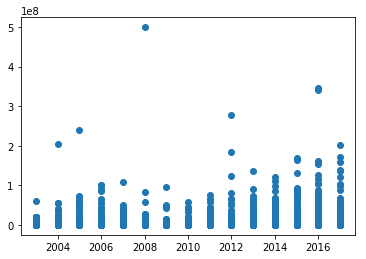

In [143]:
plt.scatter(x=housing_data["year_of_sale"],y=housing_data["sale_price"])

In [144]:
housing_data.sort_values(by="sale_price",ascending=False).tail(1)

,borough,neighborhood,building_class_category,tax_class,block,lot,easement,building_class,address,apartment_number,...,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLA,PFIRM15_FL,Version,MAPPLUTO_F,SHAPE_Leng,SHAPE_Area
195441,3,FLATLANDS,02 TWO FAMILY HOMES,1,7761,45,NaN,B1,5712 AVENUE H,NaN,...,NaN,0.0,NaN,1.0,NaN,NaN,17V1.1,0.0,227.222452,1724.950388


In [145]:
housing_data['sale_price'].describe().apply(lambda x: format(x,'f'))

count       390883.000000
mean        506754.477693
std        2353964.664225
min              0.000000
25%              0.000000
50%         275000.000000
75%         593000.000000
max      499401179.000000
Name: sale_price, dtype: object

In [146]:
zero_price_houses = housing_data[housing_data['sale_price']==0]

In [147]:
len(zero_price_houses)

140143

In [148]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390883 entries, 0 to 390882
Columns: 110 entries, borough to SHAPE_Area
dtypes: float64(64), int64(10), object(36)
memory usage: 328.0+ MB


### There are 140143 instances where sale price is zero. Remove them

In [149]:
housing_data = housing_data[housing_data['sale_price']>0]

In [150]:
housing_data['sale_price'].describe().apply(lambda x: format(x,'f'))

count       250740.000000
mean        789988.476127
std        2900768.102545
min              1.000000
25%         300000.000000
50%         496860.000000
75%         755000.000000
max      499401179.000000
Name: sale_price, dtype: object

In [151]:
import numpy as np
pd.cut(np.array([1,4,8,12,16]), bins=[0,5,10,16], retbins=True,labels=['bad','medium','good'])

([bad, bad, medium, good, good]
 Categories (3, object): [bad < medium < good], array([ 0,  5, 10, 16]))

### Using cut function to put price values in bins

In [152]:
price_range_label = ['0-200k','200k-500k','500k-800k','800k-1min','1min-10min','10min-100min','100min-500min']
bins_range = [0,200000,500000,800000,1000000,10000000,100000000,500000000]
housing_data['price_range']=pd.cut(housing_data['sale_price'],bins=bins_range,labels=price_range_label)

In [154]:
housing_data[['price_range','sale_price']].head()

,price_range,sale_price
0,100min-500min,499401179.0
1,100min-500min,345000000.0
2,100min-500min,340000000.0
3,100min-500min,276947000.0
4,100min-500min,202500000.0


Exception KeyboardInterrupt in 'zmq.backend.cython.message.Frame.__dealloc__' ignored


KeyboardInterrupt: 

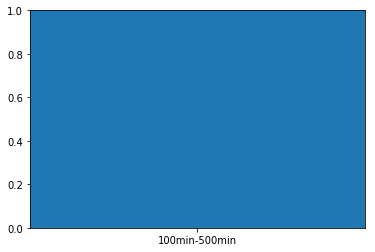

In [155]:
# Lets plot them
plt.bar(housing_data['price_range'],height = housing_data['sale_price'])